# Customer Segmentation Classification

## _Context (Use Case)_
An *automobile company* has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

In [163]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Test & Train datasets

In [164]:
train_df = pd.read_csv(r"C:\Users\dhchaudhary\Desktop\MasterProject\Data_Science_Case_Studies\Train.csv")

In [165]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [166]:
train_df.shape

(8068, 11)

In [167]:
# test_df = pd.read_csv(r"C:\Users\dhchaudhary\Desktop\MasterProject\Data_Science_Case_Studies\Test.csv")
# test_df.head()

In [168]:
# test_df.shape

# Exploratory Data Analysis

In [169]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [170]:
df = train_df.copy()

In [171]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

                     column_name  percent_missing
ID                            ID         0.000000
Gender                    Gender         0.000000
Ever_Married        Ever_Married         1.735250
Age                          Age         0.000000
Graduated              Graduated         0.966782
Profession            Profession         1.536936
Work_Experience  Work_Experience        10.275161
Spending_Score    Spending_Score         0.000000
Family_Size          Family_Size         4.152206
Var_1                      Var_1         0.941993
Segmentation        Segmentation         0.000000


In [172]:
df1 = df.copy()

# ------------------------------------------------------------------------

In [173]:
df2 = df1.copy()

In [174]:
# item_dict = dict(df2.isna().sum())
# item_dict

In [175]:
# new_dict = {k: v for k, v in sorted(item_dict.items(), key=lambda item: item[1])}

In [176]:
# new_dict

In [177]:
# lst = []
# for i in new_dict:
#     if new_dict[i]!=0:
#         print(i)
#         lst.append(i)
#         print(lst)
# print("final list",lst)

In [178]:
# lst = []
# data_loss = []
# for i in new_dict:
#     if new_dict[i]!=0:
# #         print(i)
#         lst.append(i)
#         print("Choosen Feature: ", lst)
#         df2.dropna(subset=lst, inplace=True)
#         loss = (train_df.shape[0] - df2.shape[0] )*100/train_df.shape[0]
#         data_loss.append(loss)
#         print("Data Loss after dropping NAN of choosen Feature : ", round(data_loss[-1],2), "%")
# # print("Final list",lst)
# # print("final data loss list",data_loss)

In [179]:
# df2.shape

In [180]:
df.shape

(8068, 11)

In [181]:
col_lst = ['Var_1', 'Graduated', 'Profession', 'Ever_Married', 'Family_Size']

In [182]:
df.dropna(axis =0, subset=col_lst, how='any', inplace=True)

In [183]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    711
Spending_Score       0
Family_Size          0
Var_1                0
Segmentation         0
dtype: int64

In [184]:
df.shape

(7376, 11)

In [185]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


<AxesSubplot:>

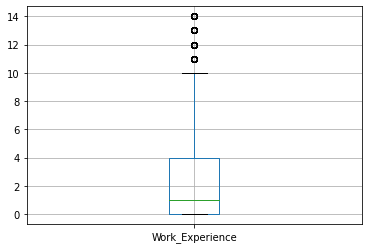

In [186]:
df.boxplot(column = ['Work_Experience'])

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_Experience', ylabel='count'>

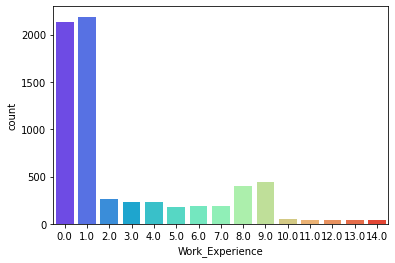

In [187]:
sns.countplot(df['Work_Experience'], palette='rainbow')

In [188]:
df['Work_Experience'].value_counts()

1.0     2187
0.0     2133
9.0      443
8.0      397
2.0      259
3.0      235
4.0      233
6.0      187
7.0      185
5.0      179
10.0      51
12.0      45
11.0      45
13.0      43
14.0      43
Name: Work_Experience, dtype: int64

In [189]:
# replace Nan of Work_exp with 0, if 'not Graduated'
def check_exp(col):
    Work_Experience = col[0]
    Graduated = col[1]
    
    if pd.isnull(Work_Experience):
        if Graduated == 'No':
            return 0
    else:
        return col[0]

In [190]:
df['Work_Experience'] = df[['Work_Experience', 'Graduated']].apply(check_exp, axis=1)

In [191]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    399
Spending_Score       0
Family_Size          0
Var_1                0
Segmentation         0
dtype: int64

In [192]:
df['Work_Experience'].value_counts()

0.0     2445
1.0     2187
9.0      443
8.0      397
2.0      259
3.0      235
4.0      233
6.0      187
7.0      185
5.0      179
10.0      51
12.0      45
11.0      45
13.0      43
14.0      43
Name: Work_Experience, dtype: int64

<AxesSubplot:>

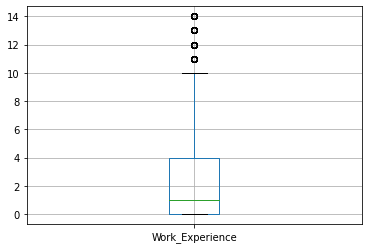

In [193]:
df.boxplot(column = ['Work_Experience'])

In [194]:
print (df.describe())

                  ID          Age  Work_Experience  Family_Size
count    7376.000000  7376.000000      6977.000000  7376.000000
mean   463474.733595    43.531996         2.511538     2.847343
std      2583.274059    16.618211         3.372415     1.528048
min    458982.000000    18.000000         0.000000     1.000000
25%    461292.750000    31.000000         0.000000     2.000000
50%    463459.500000    41.000000         1.000000     3.000000
75%    465698.250000    53.000000         4.000000     4.000000
max    467974.000000    89.000000        14.000000     9.000000


In [195]:
df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace = True)

In [196]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [197]:
df['Work_Experience'].value_counts()

0.000000     2445
1.000000     2187
9.000000      443
2.511538      399
8.000000      397
2.000000      259
3.000000      235
4.000000      233
6.000000      187
7.000000      185
5.000000      179
10.000000      51
12.000000      45
11.000000      45
13.000000      43
14.000000      43
Name: Work_Experience, dtype: int64

In [198]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.511538,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.511538,High,6.0,Cat_6,A


## 2. Handling Categorical Column

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7376 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7376 non-null   int64  
 1   Gender           7376 non-null   object 
 2   Ever_Married     7376 non-null   object 
 3   Age              7376 non-null   int64  
 4   Graduated        7376 non-null   object 
 5   Profession       7376 non-null   object 
 6   Work_Experience  7376 non-null   float64
 7   Spending_Score   7376 non-null   object 
 8   Family_Size      7376 non-null   float64
 9   Var_1            7376 non-null   object 
 10  Segmentation     7376 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 949.5+ KB


In [200]:
df.Spending_Score.value_counts()

Low        4401
Average    1844
High       1131
Name: Spending_Score, dtype: int64

- Applying Label encoding on Spending score

In [201]:
change_var = {"Spending_Score":     {"Low": 1, "Average": 2, "High": 3}}

In [202]:
df = df.replace(change_var)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,1,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.511538,2,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,1,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,3,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.511538,3,6.0,Cat_6,A


- Applying One-hot-encoding to rest of the Categorical column

In [203]:
# Gender = pd.get_dummies(df['Gender'], drop_first=True)
# Ever_Married = pd.get_dummies(df['Ever_Married'], drop_first=True)
# Graduated = pd.get_dummies(df['Graduated'], drop_first=True)
# Profession = pd.get_dummies(df['Profession'], drop_first=True)
# Var_1 = pd.get_dummies(df['Var_1'], drop_first=True)

In [204]:
# df.drop(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1'], axis=1, inplace=True)

In [205]:
# df.head()

In [206]:
# df = pd.concat([df, Gender, Ever_Married, Graduated, Profession, Var_1 ], axis =1)
# df.shape

In [207]:
# pd.set_option('display.max_columns', None)

In [208]:
# df.head()

In [209]:
df.drop(['ID'], axis=1, inplace=True)

### Converting 'float' values into 'int'

In [210]:
# df = df.astype(int)

In [211]:
df.shape

(7376, 10)

In [212]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,1,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.511538,2,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,1,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,3,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.511538,3,6.0,Cat_6,A


In [213]:
df['Work_Experience'] = df['Work_Experience'].astype(int)

In [214]:
df['Family_Size'] = df['Family_Size'].astype(int)

In [215]:
# df.head()

In [216]:
# change_var = {"Segmentation":     {"A": 1, "B": 2, "C": 3, "D":4}}

In [217]:
# df = df.replace(change_var)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1,1,4,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2,2,3,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1,1,1,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0,3,2,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2,3,6,Cat_6,A


In [218]:
df['Age_Bins'] = pd.qcut(df['Age'], 5, labels=['Age_lt_31', 'Age_31_to_35', 'Age_35_to_40', 'Age_40_to_46', 'Age_gt_46'])

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

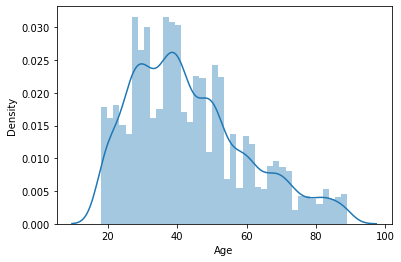

In [219]:
sns.distplot(df['Age'].dropna(), bins=40)

In [220]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bins
0,Male,No,22,No,Healthcare,1,1,4,Cat_4,D,Age_lt_31
1,Female,Yes,38,Yes,Engineer,2,2,3,Cat_4,A,Age_35_to_40
2,Female,Yes,67,Yes,Engineer,1,1,1,Cat_6,B,Age_gt_46
3,Male,Yes,67,Yes,Lawyer,0,3,2,Cat_6,B,Age_gt_46
4,Female,Yes,40,Yes,Entertainment,2,3,6,Cat_6,A,Age_35_to_40


c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_Experience', ylabel='count'>

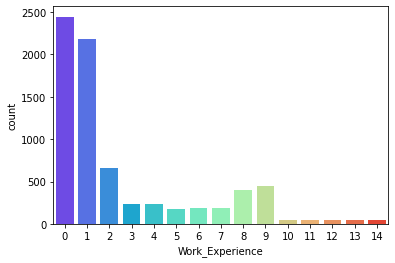

In [221]:
sns.countplot(df['Work_Experience'], palette='rainbow')

In [222]:
df3 = df.copy()

In [223]:
def fill_workexp(col):
    Work_Experience = col[0]
    
    if pd.notnull(Work_Experience):
        if Work_Experience <= 1:
            return 'Exp_lt_equal_1'
        if ((Work_Experience>= 2) and (Work_Experience<= 7)):
            return 'Exp_2_to_7'
        if ((Work_Experience>= 8) and (Work_Experience<= 9)):
            return 'Exp_8_to_9'
        else:
            return 'Exp_gt_9'
    else:
        return col[0]

In [224]:
df3['Work_Experience'] = df3[['Work_Experience']].apply(fill_workexp, axis=1)

In [225]:
df3.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bins
0,Male,No,22,No,Healthcare,Exp_lt_equal_1,1,4,Cat_4,D,Age_lt_31
1,Female,Yes,38,Yes,Engineer,Exp_2_to_7,2,3,Cat_4,A,Age_35_to_40
2,Female,Yes,67,Yes,Engineer,Exp_lt_equal_1,1,1,Cat_6,B,Age_gt_46
3,Male,Yes,67,Yes,Lawyer,Exp_lt_equal_1,3,2,Cat_6,B,Age_gt_46
4,Female,Yes,40,Yes,Entertainment,Exp_2_to_7,3,6,Cat_6,A,Age_35_to_40


In [226]:
# df['Work_Experience'] = pd.qcut(df['Work_Experience'], 5, labels=['Exp_lt_1','Exp_1_to_2' 'Exp_2_to_7', 'Exp_7_to_9', 'Exp_gt_9'],
#                                duplicates='drop')
# # df['Family_Size'] = pd.qcut(df['Family_Size'], 5, labels=['Size_lt_1', 'Size_1_to_2', 'Size_2_to_5', 'Size_gt_9'],duplicates='drop')

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

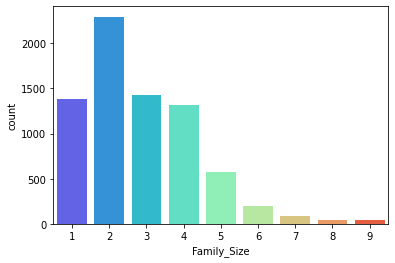

In [227]:
sns.countplot(df['Family_Size'], palette='rainbow')

In [228]:
def fill_workexp(col):
    Family_Size = col[0]
    
    if pd.notnull(Family_Size):
        if Family_Size <= 1:
            return 'FamSize_1'
        if Family_Size == 2:
            return 'FamSize_2'
        if ((Family_Size>= 3) and (Family_Size<= 5)):
            return 'FamSize_3_to_5'
        else:
            return 'FamSize_gt_6'
    else:
        return col[0]

In [229]:
df3['Family_Size'] = df3[['Family_Size']].apply(fill_workexp, axis=1)

In [230]:
df3.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bins
0,Male,No,22,No,Healthcare,Exp_lt_equal_1,1,FamSize_3_to_5,Cat_4,D,Age_lt_31
1,Female,Yes,38,Yes,Engineer,Exp_2_to_7,2,FamSize_3_to_5,Cat_4,A,Age_35_to_40
2,Female,Yes,67,Yes,Engineer,Exp_lt_equal_1,1,FamSize_1,Cat_6,B,Age_gt_46
3,Male,Yes,67,Yes,Lawyer,Exp_lt_equal_1,3,FamSize_2,Cat_6,B,Age_gt_46
4,Female,Yes,40,Yes,Entertainment,Exp_2_to_7,3,FamSize_gt_6,Cat_6,A,Age_35_to_40


In [231]:
df3.drop(['Age'], axis=1, inplace=True)

In [232]:
df3.head()

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bins
0,Male,No,No,Healthcare,Exp_lt_equal_1,1,FamSize_3_to_5,Cat_4,D,Age_lt_31
1,Female,Yes,Yes,Engineer,Exp_2_to_7,2,FamSize_3_to_5,Cat_4,A,Age_35_to_40
2,Female,Yes,Yes,Engineer,Exp_lt_equal_1,1,FamSize_1,Cat_6,B,Age_gt_46
3,Male,Yes,Yes,Lawyer,Exp_lt_equal_1,3,FamSize_2,Cat_6,B,Age_gt_46
4,Female,Yes,Yes,Entertainment,Exp_2_to_7,3,FamSize_gt_6,Cat_6,A,Age_35_to_40


In [233]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [234]:
df3.head()

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bins
0,Male,No,No,Healthcare,Exp_lt_equal_1,1,FamSize_3_to_5,Cat_4,D,Age_lt_31
1,Female,Yes,Yes,Engineer,Exp_2_to_7,2,FamSize_3_to_5,Cat_4,A,Age_35_to_40
2,Female,Yes,Yes,Engineer,Exp_lt_equal_1,1,FamSize_1,Cat_6,B,Age_gt_46
3,Male,Yes,Yes,Lawyer,Exp_lt_equal_1,3,FamSize_2,Cat_6,B,Age_gt_46
4,Female,Yes,Yes,Entertainment,Exp_2_to_7,3,FamSize_gt_6,Cat_6,A,Age_35_to_40


In [237]:
# for col in df3.columns:
#     if col == 'Segmentation': continue
#     else:
#         print('WoE and IV for column: {}'.format(col))
#         df4, iv = calculate_woe_iv(df3, col, 'Segmentation')
#         print(df4)
#         print('IV score: {:.2f}'.format(iv))
#         print('\n')

In [236]:
df3.head()

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bins
0,Male,No,No,Healthcare,Exp_lt_equal_1,1,FamSize_3_to_5,Cat_4,D,Age_lt_31
1,Female,Yes,Yes,Engineer,Exp_2_to_7,2,FamSize_3_to_5,Cat_4,A,Age_35_to_40
2,Female,Yes,Yes,Engineer,Exp_lt_equal_1,1,FamSize_1,Cat_6,B,Age_gt_46
3,Male,Yes,Yes,Lawyer,Exp_lt_equal_1,3,FamSize_2,Cat_6,B,Age_gt_46
4,Female,Yes,Yes,Entertainment,Exp_2_to_7,3,FamSize_gt_6,Cat_6,A,Age_35_to_40


In [238]:
Gender = pd.get_dummies(df3['Gender'], drop_first=True)
Ever_Married = pd.get_dummies(df3['Ever_Married'], drop_first=True)
Graduated = pd.get_dummies(df3['Graduated'], drop_first=True)
Profession = pd.get_dummies(df3['Profession'], drop_first=True)
Work_Experience = pd.get_dummies(df3['Work_Experience'], drop_first=True)
Family_Size = pd.get_dummies(df3['Family_Size'], drop_first=True)
Var_1 = pd.get_dummies(df3['Var_1'], drop_first=True)
Age_Bins = pd.get_dummies(df3['Age_Bins'], drop_first=True)

In [240]:
df3.drop(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Work_Experience','Family_Size', 'Var_1', 'Age_Bins'], axis=1, inplace=True)
df3.head()

,Spending_Score,Segmentation
0,1,D
1,2,A
2,1,B
3,3,B
4,3,A


In [243]:
df4 = pd.concat([df3, Gender, Ever_Married, Graduated, Profession, Work_Experience, Family_Size, Var_1, Age_Bins ], axis =1)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bins
0,Male,No,22,No,Healthcare,1,1,4,Cat_4,D,Age_lt_31
1,Female,Yes,38,Yes,Engineer,2,2,3,Cat_4,A,Age_35_to_40
2,Female,Yes,67,Yes,Engineer,1,1,1,Cat_6,B,Age_gt_46
3,Male,Yes,67,Yes,Lawyer,0,3,2,Cat_6,B,Age_gt_46
4,Female,Yes,40,Yes,Entertainment,2,3,6,Cat_6,A,Age_35_to_40


In [244]:
df4.head()

,Spending_Score,Segmentation,Male,Yes,Yes,Doctor,Engineer,Entertainment,Executive,Healthcare,...,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Age_31_to_35,Age_35_to_40,Age_40_to_46,Age_gt_46
0,1,D,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2,A,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,B,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,3,B,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3,A,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [245]:
df_ = df4.pop('Segmentation')
df4['Segmentation'] = df_

In [249]:
df4.head(10)

,Spending_Score,Male,Yes,Yes,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,...,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Age_31_to_35,Age_35_to_40,Age_40_to_46,Age_gt_46,Segmentation
0,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,D
1,2,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,A
2,1,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,B
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,B
4,3,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,A
5,2,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,C
6,1,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,C
7,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,D
8,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,D
9,2,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,C


In [248]:
df4.columns

Index(['Spending_Score', 'Male', 'Yes', 'Yes', 'Doctor', 'Engineer',
       'Entertainment', 'Executive', 'Healthcare', 'Homemaker', 'Lawyer',
       'Marketing', 'Exp_8_to_9', 'Exp_gt_9', 'Exp_lt_equal_1', 'FamSize_2',
       'FamSize_3_to_5', 'FamSize_gt_6', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5',
       'Cat_6', 'Cat_7', 'Age_31_to_35', 'Age_35_to_40', 'Age_40_to_46',
       'Age_gt_46', 'Segmentation'],
      dtype='object')

In [250]:
df4.columns = ['Spending_Score', 'Male', 'Ever_married', 'Graduated', 'Doctor', 'Engineer',
       'Entertainment', 'Executive', 'Healthcare', 'Homemaker', 'Lawyer',
       'Marketing', 'Exp_8_to_9', 'Exp_gt_9', 'Exp_lt_equal_1', 'FamSize_2',
       'FamSize_3_to_5', 'FamSize_gt_6', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5',
       'Cat_6', 'Cat_7', 'Age_31_to_35', 'Age_35_to_40', 'Age_40_to_46',
       'Age_gt_46', 'Segmentation']

In [251]:
df4.head()

,Spending_Score,Male,Ever_married,Graduated,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,...,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Age_31_to_35,Age_35_to_40,Age_40_to_46,Age_gt_46,Segmentation
0,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,D
1,2,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,A
2,1,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,B
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,B
4,3,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,A


In [252]:
df4.shape

(7376, 29)

In [259]:
x = df4.iloc[:, 0:-1]

In [260]:
y = df4.iloc[:, -1]

In [261]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [262]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Logistic Reg

In [263]:
logreg = LogisticRegression()

In [264]:
logreg.fit(x_train, y_train)

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [265]:
prediction = logreg.predict(x_test)

In [266]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score, classification_report, recall_score, precision_score

In [267]:
print("Confusion matrix: \n", confusion_matrix(y_test, prediction))
print("Accuracy score:", accuracy_score(y_test, prediction))
print("Precision score:", precision_score(y_test, prediction, average='micro'))
print("Recall score:", recall_score(y_test, prediction, average='micro'))

Confusion matrix: 
 [[241  66 117  93]
 [141 123 210  68]
 [ 59  67 352  61]
 [132  28  35 420]]
Accuracy score: 0.5133303208314505
Precision score: 0.5133303208314505
Recall score: 0.5133303208314505


In [268]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           A       0.42      0.47      0.44       517
           B       0.43      0.23      0.30       542
           C       0.49      0.65      0.56       539
           D       0.65      0.68      0.67       615

    accuracy                           0.51      2213
   macro avg       0.50      0.51      0.49      2213
weighted avg       0.51      0.51      0.50      2213



## K-nearest Neighbour classifier

In [269]:
from sklearn.neighbors import KNeighborsClassifier

In [270]:
error_rate=[]
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

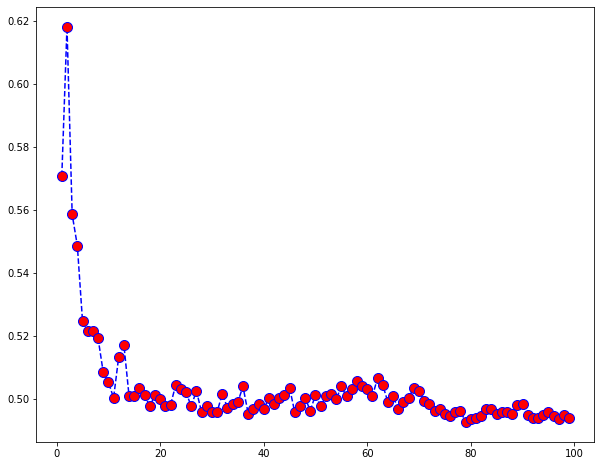

In [271]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 100), error_rate,color='blue',markerfacecolor='red', markersize=10, marker='o', linestyle='dashed' )

In [272]:
knn = KNeighborsClassifier(n_neighbors=79)

In [273]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=79)

In [274]:
pred = knn.predict(x_test)

In [275]:
confusion_matrix(y_test, pred)

array([[236,  72, 131,  78],
       [121, 109, 242,  70],
       [ 56,  39, 376,  68],
       [131,  42,  40, 402]], dtype=int64)

In [276]:
print(accuracy_score(y_test, pred))

0.5074559421599638


In [277]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           A       0.43      0.46      0.44       517
           B       0.42      0.20      0.27       542
           C       0.48      0.70      0.57       539
           D       0.65      0.65      0.65       615

    accuracy                           0.51      2213
   macro avg       0.49      0.50      0.48      2213
weighted avg       0.50      0.51      0.49      2213



In [278]:
print("Precision score:", precision_score(y_test, pred, average='micro'))
print("Recall score:", recall_score(y_test, pred, average='micro'))

Precision score: 0.5074559421599638
Recall score: 0.5074559421599638


## Random forest

In [279]:
from sklearn.ensemble import RandomForestClassifier

In [280]:
clf = RandomForestClassifier(max_depth=11, random_state=0)

In [281]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [282]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=11, random_state=0)

In [283]:
pred_randomclas = clf.predict(x_test)

In [284]:
confusion_matrix(y_test, pred_randomclas)

array([[261,  80,  80,  96],
       [137, 146, 187,  72],
       [ 75,  65, 330,  69],
       [127,  44,  16, 428]], dtype=int64)

In [285]:
print(accuracy_score(y_test, pred_randomclas))

0.52643470402169


In [286]:
print("Precision score:", precision_score(y_test, pred_randomclas, average='micro'))
print("Recall score:", recall_score(y_test, pred_randomclas, average='micro'))

Precision score: 0.52643470402169
Recall score: 0.52643470402169


### Hyper-parameter optimization with Random forest

In [287]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [288]:
random_clf = RandomForestClassifier()

In [289]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [290]:
random_search = RandomizedSearchCV(estimator = random_clf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [291]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [292]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variabl

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Time taken: 0 hours 1 minutes and 22.22 seconds.


In [293]:
random_search.best_estimator_

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=1200)

In [294]:
random_clf = RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=1200)

In [295]:
random_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=1200)

In [296]:
random_pred = random_clf.predict(x_test)

In [297]:
print("Accuracy: ", accuracy_score(y_test, pred_randomclas))
print("Precision score: ", precision_score(y_test, pred_randomclas, average='micro'))
print("Recall score: ", recall_score(y_test, pred_randomclas, average='micro'))

Accuracy:  0.52643470402169
Precision score:  0.52643470402169
Recall score:  0.52643470402169


In [298]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_randomclas, average=None)

array([0.46732319, 0.33295325, 0.57291667, 0.66875   ])

## Gradient Boosting Classifier

In [299]:
# import xgboost
# from sklearn.ensemble import xgboost

In [300]:
from sklearn.ensemble import GradientBoostingClassifier

In [301]:
clf_gradient = GradientBoostingClassifier(learning_rate=1.0, max_depth=4, random_state=0).fit(x_train, y_train)

In [302]:
pprint(clf_gradient.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [303]:
pred_gradient = clf_gradient.predict(x_test)

In [304]:
print(accuracy_score(y_test, pred_gradient))

0.49073655671034794


### Parameter tuning for gradient boost

In [305]:
clf_gradient = GradientBoostingClassifier()

In [306]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [307]:
# params = {
#     "learning_rate" : [0.05, 0.01, 0.1, 0.23, 0.15, 0.4],
#     "max_depth"     : [3, 4, 5, 6, 8, 10, 12, 15, 17],
#     "gamma"   : [0.1, 0.2, 0.3, 0.4, 0.5],
#     "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
# }

In [308]:
random_search = RandomizedSearchCV(estimator = clf_gradient, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [309]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [310]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variabl

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Time taken: 0 hours 0 minutes and 9.58 seconds.


In [311]:
random_search.best_estimator_

GradientBoostingClassifier(max_depth=16, max_features='sqrt',
                           min_samples_leaf=4, n_estimators=9)

In [312]:
clf_gradient = GradientBoostingClassifier(max_depth=16, max_features='sqrt',
                           min_samples_leaf=4, n_estimators=9)

In [313]:
clf_gradient.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=16, max_features='sqrt',
                           min_samples_leaf=4, n_estimators=9)

In [314]:
pred_gradient = clf_gradient.predict(x_test)

In [315]:
print("Accuracy: ", accuracy_score(y_test, pred_gradient))
print("Precision score: ", precision_score(y_test, pred_gradient, average='micro'))
print("Recall score: ", recall_score(y_test, pred_gradient, average='micro'))

Accuracy:  0.5268865793041121
Precision score:  0.5268865793041121
Recall score:  0.5268865793041121


## XGB Classifier

In [316]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from xgboost.sklearn import XGBClassifier

In [317]:
# !pip install xgboost

In [318]:
grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
kf = KFold(n_splits=2)

gs = GridSearchCV(estimator = XGBClassifier(n_estimators=500), param_grid = grid, scoring='accuracy',n_jobs=4, cv=kf)

In [319]:
gs.fit(x_train, y_train)

y_pred = gs.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 53.37%


In [323]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred, average='micro'))
print("Recall score: ", recall_score(y_test, y_pred, average='micro'))

Accuracy:  0.5336647085404428
Precision score:  0.5336647085404428
Recall score:  0.5336647085404428


In [321]:
# pprint(gs.get_params())

In [322]:
gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [350]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=5,monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [353]:
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 54.04%


[0.09673569 0.0672416  0.0587531  0.071518   0.03237284 0.02966603
 0.03229666 0.02061131 0.07949439 0.01865211 0.01430929 0.02074864
 0.03656292 0.01900953 0.05857471 0.03687756 0.04004864 0.01686534
 0.01820369 0.02498637 0.02467939 0.00786503 0.03272078 0.01362774
 0.04104325 0.03204392 0.03189115 0.02260035]


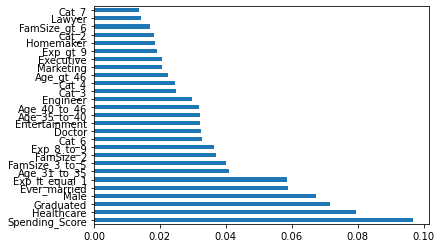

In [326]:
X = df4.iloc[:,0:-1]  #independent columns
y = df4.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()